# Mutual Fund & ETFs Analysis
---

# Part 6 - Modeling - ETF Alpha

For this model, we'll be predicting ETF 3-year alpha average using the selected features from previous notebook. 

## Content

1. [Model Preparation](#Model-Preparation)
2. [Cross Validation](#Cross-Validation)
3. [Modeling](#Modeling)
4. [Result](#Result)
5. [Tuning](#Tuning)

## Links to Other Notebooks

- [Part 1: Data Cleaning](Part_1_Cleaning.ipynb)
- [Part 2: Exploratory Data Analysis](Part_2_EDA.ipynb)
- [Part 3: Modeling: Mutual Fund v1](Part_3_Modeling_MF_v1.ipynb) - Mutual Fund Prediction of fund returns
- [Part 4: Modeling: Mutual Fund v2](Part_4_Modeling_MF_v2.ipynb) - Mutual Fund Prediction of alpha
- [Part 5: Modeling: ETFs v1](Part_5_Modeling_ETF_v1.ipynb) - ETF Prediction of fund returns
- [Part 7: Evaluation & Conclusion](Part_7_Conclusion.ipynb)

### Libraries

In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statistics
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# set display options
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_columns", 300)

### Load datasets

In [2]:
etf = pd.read_csv('../datasets/etf_processed.csv')

## Model Preparation

First, we'll set our X and y, and split the data using test size 20%. We'll scale data using StandardScaler as some of the columns were not normally distributed. 

We'll generate predictions using:
- **Supervised learning**: Linear regression, Lasso regression, Ridge regression
- **Clustering**: KNeighbors regressor
- **Ensemble learning**: Decision tree, Bagged tree, Random Forest, Adaptive Boosting, Support Vector, Gradient Boosting

In [3]:
X = etf.drop(columns=['fund_alpha_3years', 'fund_return_ytd'])
y = etf['fund_alpha_3years']

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [5]:
# Scaling the dataset

ss = StandardScaler()
ss.fit(X_train)

X_train_sc = ss.transform(X_train)
X_test_sc = ss.transform(X_test)

In [6]:
# Instantiate models

lr = LinearRegression()
lasso = LassoCV(n_alphas=100)
ridge = RidgeCV(alphas=np.linspace(1, 200, 100))
knn = KNeighborsRegressor()
decision_tree = DecisionTreeRegressor()
bagged = BaggingRegressor()
random_forest = RandomForestRegressor()
adaboost = AdaBoostRegressor()
support_vector = SVR()
gradient_boost = GradientBoostingRegressor()

## Cross Validation

Before we can build our models, we'll first need to ensure our models are reliable. We'll use the cross-validation technique to train several machine learning models on subsets of the dataset and evaluate them for any signs of overfitting.

In [7]:
# Testing linear regression model

lr_cv_scores = cross_val_score(lr, X_train_sc, y_train, cv=5)
lr_cv_mean = lr_cv_scores.mean()
print(f"Linear Regression R2 cross-validation score: {lr_cv_mean}")
      
lr_cv_mse_scores = -cross_val_score(lr,X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
lr_cv_rmse_mean = np.sqrt(lr_cv_mse_scores.mean())
print(f"Linear regression RSME cross-validation score:' {lr_cv_rmse_mean}")

Linear Regression R2 cross-validation score: 0.17704521226467598
Linear regression RSME cross-validation score:' 5.065165486619282


In [8]:
# Testing lasso model 

lasso_cv_scores = cross_val_score(lasso, X_train_sc, y_train, cv=5)
lasso_cv_mean = lasso_cv_scores.mean()
print(f"Lasso R2 cross-validation score: {lasso_cv_mean}")

lasso_cv_mse_scores = -cross_val_score(lasso,X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
lasso_cv_rmse_mean = np.sqrt(lasso_cv_mse_scores.mean())
print(f"Lasso RSME cross-validation score: {lasso_cv_rmse_mean}")

Lasso R2 cross-validation score: 0.2186965037639365
Lasso RSME cross-validation score: 4.985857558557398


In [9]:
# Testing ridge model

ridge_cv_scores = cross_val_score(ridge, X_train_sc, y_train, cv=5)
ridge_cv_mean = ridge_cv_scores.mean()
print(f"Ridge R2 cross-validation score: {ridge_cv_mean}")

ridge_cv_mse_scores = -cross_val_score(ridge, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
ridge_cv_rmse_mean = np.sqrt(ridge_cv_mse_scores.mean())
print(f"Ridge RSME cross-validation score: {ridge_cv_rmse_mean}")

Ridge R2 cross-validation score: 0.22420226570493246
Ridge RSME cross-validation score: 4.96716320225071


In [10]:
# Testing KNN model

knn_cv_scores = cross_val_score(knn, X_train_sc, y_train, cv=5)
knn_cv_mean = knn_cv_scores.mean()
print(f"K-Nearest Neighbor R2 cross-validation score: {knn_cv_mean}")

knn_cv_mse_scores = -cross_val_score(knn, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
knn_cv_rmse_mean = np.sqrt(knn_cv_mse_scores.mean())
print(f"K-Nearest Neighbor RSME cross-validation score: {knn_cv_rmse_mean}")

K-Nearest Neighbor R2 cross-validation score: 0.23063469333874087
K-Nearest Neighbor RSME cross-validation score: 5.054051890355431


In [11]:
# Testing decision tree model

decision_tree_cv_scores = cross_val_score(decision_tree, X_train_sc, y_train, cv=5)
decision_tree_cv_mean = decision_tree_cv_scores.mean()
print(f"Decision Tree R2 cross-validation score: {decision_tree_cv_mean}")

decision_tree_cv_mse_scores = -cross_val_score(decision_tree, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
decision_tree_cv_rmse_mean = np.sqrt(decision_tree_cv_mse_scores.mean())
print(f"Decision RSME cross-validation score: {decision_tree_cv_rmse_mean}")

Decision Tree R2 cross-validation score: -0.24193582170762712
Decision RSME cross-validation score: 5.9785975267697005


In [12]:
# Testing bagged tree model

bagged_cv_scores = cross_val_score(bagged, X_train_sc, y_train, cv=5)
bagged_cv_mean = bagged_cv_scores.mean()
print(f"Bagged Tree R2 cross-validation score: {bagged_cv_mean}")

bagged_cv_mse_scores = -cross_val_score(bagged, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
bagged_cv_rmse_mean = np.sqrt(bagged_cv_mse_scores.mean())
print(f"Bagged Tree RSME cross-validation score: {bagged_cv_rmse_mean}")

Bagged Tree R2 cross-validation score: 0.2535105657658316
Bagged Tree RSME cross-validation score: 4.836170339362715


In [13]:
# Testing random forest model

random_forest_cv_scores = cross_val_score(random_forest, X_train_sc, y_train, cv=5)
random_forest_cv_mean = random_forest_cv_scores.mean()
print(f"Random Forest R2 cross-validation score: {random_forest_cv_mean}")

random_forest_cv_mse_scores = -cross_val_score(random_forest, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
random_forest_cv_rmse_mean = np.sqrt(random_forest_cv_mse_scores.mean())
print(f"Random Forest RSME cross-validation score: {random_forest_cv_rmse_mean}")

Random Forest R2 cross-validation score: 0.30759575703982434
Random Forest RSME cross-validation score: 4.691897531539012


In [14]:
# Testing adaptive boosting model

adaboost_cv_scores = cross_val_score(adaboost, X_train_sc, y_train, cv=5)
adaboost_cv_mean = adaboost_cv_scores.mean()
print(f"Adaptive Boosting R2 cross-validation score: {adaboost_cv_mean}")

adaboost_cv_mse_scores = -cross_val_score(adaboost, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
adaboost_cv_rmse_mean = np.sqrt(adaboost_cv_mse_scores.mean())
print(f"Adaptive Boosting RSME cross-validation score: {adaboost_cv_rmse_mean}")

Adaptive Boosting R2 cross-validation score: 0.000963202288905518
Adaptive Boosting RSME cross-validation score: 5.400425786836368


In [15]:
# Testing support vector model

support_vector_cv_scores = cross_val_score(support_vector, X_train_sc, y_train, cv=5)
support_vector_cv_mean = support_vector_cv_scores.mean()
print(f"Support Vector R2 cross-validation score: {adaboost_cv_mean}")

support_vector_cv_mse_scores = -cross_val_score(support_vector, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
support_vector_cv_rmse_mean = np.sqrt(support_vector_cv_mse_scores.mean())
print(f"Support Vector RSME cross-validation score: {support_vector_cv_rmse_mean}")

Support Vector R2 cross-validation score: 0.000963202288905518
Support Vector RSME cross-validation score: 5.107507979046789


In [16]:
# Testing gradient boosting model

gradient_boost_cv_scores = cross_val_score(gradient_boost, X_train_sc, y_train, cv=5)
gradient_boost_cv_mean = gradient_boost_cv_scores.mean()
print(f"Gradient Boosting R2 cross-validation score: {gradient_boost_cv_mean}")

gradient_boost_cv_mse_scores = -cross_val_score(gradient_boost, X_train_sc, y_train,cv=5, scoring ='neg_mean_squared_error')
gradient_boost_cv_rmse_mean = np.sqrt(gradient_boost_cv_mse_scores.mean())
print(f"Gradient Boosting RSME cross-validation score: {gradient_boost_cv_rmse_mean}")

Gradient Boosting R2 cross-validation score: 0.2549503669108456
Gradient Boosting RSME cross-validation score: 4.8932653888662925


## Modeling

Once we have our cross-validation scores, we'll start building our models:

### Linear Regression

In [17]:
# Building linear regression model

lr.fit(X_train_sc, y_train)

print("Linear Regression:")
print()
linear_train_r = lr.score(X_train_sc,y_train)
print(f"R2 for training dataset: {linear_train_r}")
linear_test_r = lr.score(X_test_sc,y_test)
print(f"R2 validation dataset: {linear_test_r}")
print(f"R2 for cross-validation sets: {lr_cv_mean}")
print()
linear_train_rmse = np.sqrt(mean_squared_error(y_train, lr.predict(X_train_sc)))
print(f"RMSE for training dataset: {linear_train_rmse}")
linear_test_rmse = np.sqrt(mean_squared_error(y_test,lr.predict(X_test_sc)))
print(f"RMSE for validation dataset: {linear_test_rmse}")
print(f"RMSE for cross-validation sets: {lr_cv_rmse_mean}")

Linear Regression:

R2 for training dataset: 0.2958325865359025
R2 validation dataset: 0.17284384322311552
R2 for cross-validation sets: 0.17704521226467598

RMSE for training dataset: 4.709325225549575
RMSE for validation dataset: 6.081975816722404
RMSE for cross-validation sets: 5.065165486619282


### Lasso Regression

In [18]:
lasso.fit(X_train_sc, y_train)

lasso_alpha = lasso.alpha_
lasso_alpha

0.12674606238056868

In [19]:
lasso = Lasso(alpha=lasso_alpha)
lasso.fit(X_train_sc, y_train)

Lasso(alpha=0.12674606238056868)

In [20]:
print("Lasso Regression:")
print()
lasso_train_r = lasso.score(X_train_sc,y_train)
print(f"R2 for training dataset: {lasso_train_r}")
lasso_test_r = lasso.score(X_test_sc,y_test)
print(f"R2 validation dataset: {lasso_test_r}")
print(f"R2 for cross-validation sets: {lasso_cv_mean}")
print()
lasso_train_rmse = np.sqrt(mean_squared_error(y_train, lasso.predict(X_train_sc)))
print(f"RMSE for training dataset: {lasso_train_rmse}")
lasso_test_rmse = np.sqrt(mean_squared_error(y_test,lasso.predict(X_test_sc)))
print(f"RMSE for validation dataset: {lasso_test_rmse}")
print(f"RMSE for cross-validation sets: {lasso_cv_rmse_mean}")

Lasso Regression:

R2 for training dataset: 0.2798993542824637
R2 validation dataset: 0.17862199049247385
R2 for cross-validation sets: 0.2186965037639365

RMSE for training dataset: 4.762306272707305
RMSE for validation dataset: 6.060695590761464
RMSE for cross-validation sets: 4.985857558557398


### Ridge Regression

In [21]:
ridge.fit(X_train_sc,y_train)

ridge_alpha = ridge.alpha_
ridge_alpha

200.0

In [22]:
ridge = Ridge(alpha=ridge_alpha)
ridge.fit(X_train_sc, y_train)

Ridge(alpha=200.0)

In [23]:
print("Ridge Regression:")
print()
ridge_train_r = ridge.score(X_train_sc,y_train)
print(f"R2 for training dataset: {ridge_train_r}")
ridge_test_r = ridge.score(X_test_sc,y_test)
print(f"R2 validation dataset: {ridge_test_r}")
print(f"R2 for cross-validation sets: {ridge_cv_mean}")
print()
ridge_train_rmse = np.sqrt(mean_squared_error(y_train, ridge.predict(X_train_sc)))
print(f"RMSE for training dataset: {ridge_train_rmse}")
ridge_test_rmse = np.sqrt(mean_squared_error(y_test,ridge.predict(X_test_sc)))
print(f"RMSE for validation dataset: {ridge_test_rmse}")
print(f"RMSE for cross-validation sets: {ridge_cv_rmse_mean}")

Ridge Regression:

R2 for training dataset: 0.2844034038094896
R2 validation dataset: 0.18097898253391342
R2 for cross-validation sets: 0.22420226570493246

RMSE for training dataset: 4.747389393157756
RMSE for validation dataset: 6.051993584038954
RMSE for cross-validation sets: 4.96716320225071


### K-Nearest Neighbor

In [24]:
knn.fit(X_train_sc, y_train)

KNeighborsRegressor()

In [25]:
print("K-Nearest Neighbor:")
print()
knn_train_r = knn.score(X_train_sc,y_train)
print(f"R2 for training dataset: {knn_train_r}")
knn_test_r = knn.score(X_test_sc,y_test)
print(f"R2 validation dataset: {knn_test_r}")
print(f"R2 for cross-validation sets: {knn_cv_mean}")
print()
knn_train_rmse = np.sqrt(mean_squared_error(y_train, knn.predict(X_train_sc)))
print(f"RMSE for training dataset: {knn_train_rmse}")
knn_test_rmse = np.sqrt(mean_squared_error(y_test,knn.predict(X_test_sc)))
print(f"RMSE for validation dataset: {knn_test_rmse}")
print(f"RMSE for cross-validation sets: {knn_cv_rmse_mean}")

K-Nearest Neighbor:

R2 for training dataset: 0.46490025353772524
R2 validation dataset: 0.21667193581751187
R2 for cross-validation sets: 0.23063469333874087

RMSE for training dataset: 4.105235678288526
RMSE for validation dataset: 5.918651636119801
RMSE for cross-validation sets: 5.054051890355431


### Decision Tree

In [26]:
decision_tree.fit(X_train_sc, y_train)

DecisionTreeRegressor()

In [27]:
print("Decision Tree:")
print()
decision_tree_train_r = decision_tree.score(X_train_sc,y_train)
print(f"R2 for training dataset: {decision_tree_train_r}")
decision_tree_test_r = decision_tree.score(X_test_sc,y_test)
print(f"R2 validation dataset: {decision_tree_test_r}")
print(f"R2 for cross-validation sets: {decision_tree_cv_mean}")
print()
decision_tree_train_rmse = np.sqrt(mean_squared_error(y_train, decision_tree.predict(X_train_sc)))
print(f"RMSE for training dataset: {decision_tree_train_rmse}")
decision_tree_test_rmse = np.sqrt(mean_squared_error(y_test,decision_tree.predict(X_test_sc)))
print(f"RMSE for validation dataset: {decision_tree_test_rmse}")
print(f"RMSE for cross-validation sets: {decision_tree_cv_rmse_mean}")

Decision Tree:

R2 for training dataset: 1.0
R2 validation dataset: 0.2810473834220921
R2 for cross-validation sets: -0.24193582170762712

RMSE for training dataset: 0.0
RMSE for validation dataset: 5.670235150914525
RMSE for cross-validation sets: 5.9785975267697005


### Bagged Tree

In [28]:
bagged.fit(X_train_sc, y_train)

BaggingRegressor()

In [29]:
print("Bagged Tree:")
print()
bagged_train_r = bagged.score(X_train_sc,y_train)
print(f"R2 for training dataset: {bagged_train_r}")
bagged_test_r = bagged.score(X_test_sc,y_test)
print(f"R2 validation dataset: {bagged_test_r}")
print(f"R2 for cross-validation sets: {bagged_cv_mean}")
print()
bagged_train_rmse = np.sqrt(mean_squared_error(y_train, bagged.predict(X_train_sc)))
print(f"RMSE for training dataset: {bagged_train_rmse}")
bagged_test_rmse = np.sqrt(mean_squared_error(y_test, bagged.predict(X_test_sc)))
print(f"RMSE for validation dataset: {bagged_test_rmse}")
print(f"RMSE for cross-validation sets: {bagged_cv_rmse_mean}")

Bagged Tree:

R2 for training dataset: 0.8475514089961789
R2 validation dataset: 0.23219053991879246
R2 for cross-validation sets: 0.2535105657658316

RMSE for training dataset: 2.1912020697057533
RMSE for validation dataset: 5.859730803740706
RMSE for cross-validation sets: 4.836170339362715


### Random Forest

In [30]:
random_forest.fit(X_train_sc, y_train)

RandomForestRegressor()

In [31]:
print("Random Forest:")
print()
random_forest_train_r = random_forest.score(X_train_sc,y_train)
print(f"R2 for training dataset: {random_forest_train_r}")
random_forest_test_r = random_forest.score(X_test_sc,y_test)
print(f"R2 validation dataset: {random_forest_test_r}")
print(f"R2 for cross-validation sets: {random_forest_cv_mean}")
print()
random_forest_train_rmse = np.sqrt(mean_squared_error(y_train, random_forest.predict(X_train_sc)))
print(f"RMSE for training dataset: {random_forest_train_rmse}")
random_forest_test_rmse = np.sqrt(mean_squared_error(y_test, random_forest.predict(X_test_sc)))
print(f"RMSE for validation dataset: {random_forest_test_rmse}")
print(f"RMSE for cross-validation sets: {random_forest_cv_rmse_mean}")

Random Forest:

R2 for training dataset: 0.9139803673184876
R2 validation dataset: 0.2679345821763115
R2 for cross-validation sets: 0.30759575703982434

RMSE for training dataset: 1.64596089864988
RMSE for validation dataset: 5.721710517099513
RMSE for cross-validation sets: 4.691897531539012


### Adaptive Boosting

In [32]:
adaboost.fit(X_train_sc, y_train)

AdaBoostRegressor()

In [33]:
print("Adaptive Boosting:")
print()
adaboost_train_r = adaboost.score(X_train_sc,y_train)
print(f"R2 for training dataset: {adaboost_train_r}")
adaboost_test_r = adaboost.score(X_test_sc,y_test)
print(f"R2 validation dataset: {adaboost_test_r}")
print(f"R2 for cross-validation sets: {adaboost_cv_mean}")
print()
adaboost_train_rmse = np.sqrt(mean_squared_error(y_train, adaboost.predict(X_train_sc)))
print(f"RMSE for training dataset: {adaboost_train_rmse}")
adaboost_test_rmse = np.sqrt(mean_squared_error(y_test, adaboost.predict(X_test_sc)))
print(f"RMSE for validation dataset: {adaboost_test_rmse}")
print(f"RMSE for cross-validation sets: {adaboost_cv_rmse_mean}")

Adaptive Boosting:

R2 for training dataset: 0.5029072799157855
R2 validation dataset: 0.19626540858100727
R2 for cross-validation sets: 0.000963202288905518

RMSE for training dataset: 3.9567574026059256
RMSE for validation dataset: 5.995249556792583
RMSE for cross-validation sets: 5.400425786836368


### Support Vector

In [34]:
support_vector.fit(X_train_sc, y_train)

SVR()

In [35]:
print("Support Vector:")
print()
support_vector_train_r = support_vector.score(X_train_sc,y_train)
print(f"R2 for training dataset: {support_vector_train_r}")
support_vector_test_r = support_vector.score(X_test_sc,y_test)
print(f"R2 validation dataset: {support_vector_test_r}")
print(f"R2 for cross-validation sets: {support_vector_cv_mean}")
print()
support_vector_train_rmse = np.sqrt(mean_squared_error(y_train, support_vector.predict(X_train_sc)))
print(f"RMSE for training dataset: {support_vector_train_rmse}")
support_vector_test_rmse = np.sqrt(mean_squared_error(y_test, support_vector.predict(X_test_sc)))
print(f"RMSE for validation dataset: {support_vector_test_rmse}")
print(f"RMSE for cross-validation sets: {support_vector_cv_rmse_mean}")

Support Vector:

R2 for training dataset: 0.23949915352206352
R2 validation dataset: 0.12878298415196632
R2 for cross-validation sets: 0.18832927364055485

RMSE for training dataset: 4.89407446451355
RMSE for validation dataset: 6.241861244798654
RMSE for cross-validation sets: 5.107507979046789


### Gradient Boosting

In [36]:
gradient_boost.fit(X_train_sc, y_train)

GradientBoostingRegressor()

In [37]:
print("Gradient Boosting:")
print()
gradient_boost_train_r = gradient_boost.score(X_train_sc,y_train)
print(f"R2 for training dataset: {gradient_boost_train_r}")
gradient_boost_test_r = gradient_boost.score(X_test_sc,y_test)
print(f"R2 validation dataset: {gradient_boost_test_r}")
print(f"R2 for cross-validation sets: {gradient_boost_cv_mean}")
print()
gradient_boost_train_rmse = np.sqrt(mean_squared_error(y_train, gradient_boost.predict(X_train_sc)))
print(f"RMSE for training dataset: {gradient_boost_train_rmse}")
gradient_boost_test_rmse = np.sqrt(mean_squared_error(y_test, gradient_boost.predict(X_test_sc)))
print(f"RMSE for validation dataset: {gradient_boost_test_rmse}")
print(f"RMSE for cross-validation sets: {gradient_boost_cv_rmse_mean}")

Gradient Boosting:

R2 for training dataset: 0.8007909996867268
R2 validation dataset: 0.2768631336666326
R2 for cross-validation sets: 0.2549503669108456

RMSE for training dataset: 2.504812374197003
RMSE for validation dataset: 5.686711382568365
RMSE for cross-validation sets: 4.8932653888662925


## Result

Now we'll compile the results into a dataframe for evaluation:

In [38]:
# Creating table of the results

results = pd.DataFrame(data=[["Linear", linear_train_r, linear_test_r, lr_cv_mean, linear_train_rmse, linear_test_rmse, lr_cv_rmse_mean],
                                ["Lasso", lasso_train_r, lasso_test_r, lasso_cv_mean, lasso_train_rmse, lasso_test_rmse, lasso_cv_rmse_mean],
                                ["Ridge", ridge_train_r, ridge_test_r, ridge_cv_mean, ridge_train_rmse, ridge_test_rmse, ridge_cv_rmse_mean],
                                ["K-Nearest Neighbor", knn_train_r, knn_test_r, knn_cv_mean, knn_train_rmse, knn_test_rmse, knn_cv_rmse_mean],
                                ["Decision Tree", decision_tree_train_r, decision_tree_test_r, decision_tree_cv_mean, decision_tree_train_rmse, decision_tree_test_rmse, decision_tree_cv_rmse_mean],
                                ["Bagged Tree", bagged_train_r, bagged_test_r, bagged_cv_mean, bagged_train_rmse, bagged_test_rmse, bagged_cv_rmse_mean],
                                ["Random Forest", random_forest_train_r, random_forest_test_r, random_forest_cv_mean, random_forest_train_rmse, random_forest_test_rmse, random_forest_cv_rmse_mean],
                                ["Adaptive Boosting", adaboost_train_r, adaboost_test_r, adaboost_cv_mean, adaboost_train_rmse, adaboost_test_rmse, adaboost_cv_rmse_mean],
                                ["Support Vector", support_vector_train_r, support_vector_test_r, support_vector_cv_mean, support_vector_train_rmse, support_vector_test_rmse, support_vector_cv_rmse_mean],
                                ["Gradient Boosting", gradient_boost_train_r, gradient_boost_test_r, gradient_boost_cv_mean, gradient_boost_train_rmse, gradient_boost_test_rmse, gradient_boost_cv_rmse_mean]],
                                columns=['Model', 'R2 Train Set','R2 Test Set', 'R2 Cross-Val', 'RMSE Train Set','RMSE Test Set', 'RMSE Cross-Val'])

results

,Model,R2 Train Set,R2 Test Set,R2 Cross-Val,RMSE Train Set,RMSE Test Set,RMSE Cross-Val
0,Linear,0.295833,0.172844,0.177045,4.709325,6.081976,5.065165
1,Lasso,0.279899,0.178622,0.218697,4.762306,6.060696,4.985858
2,Ridge,0.284403,0.180979,0.224202,4.747389,6.051994,4.967163
3,K-Nearest Neighbor,0.464900,0.216672,0.230635,4.105236,5.918652,5.054052
4,Decision Tree,1.000000,0.281047,-0.241936,0.000000,5.670235,5.978598
5,Bagged Tree,0.847551,0.232191,0.253511,2.191202,5.859731,4.836170
6,Random Forest,0.913980,0.267935,0.307596,1.645961,5.721711,4.691898
7,Adaptive Boosting,0.502907,0.196265,0.000963,3.956757,5.995250,5.400426
8,Support Vector,0.239499,0.128783,0.188329,4.894074,6.241861,5.107508
9,Gradient Boosting,0.800791,0.276863,0.254950,2.504812,5.686711,4.893265


Based on the results, Random Forest has shown the highest R2 and lowest RMSE cross validation score. The training and testing scores are also more consistent compared to the other models. The next best model is bagged tree, which we will ignore as it has the tendency to overfit. 

Next, we'll perform a GridSearch to tune the Random Forest model and hope to achieve better results.

## Tuning

GridSearch uses different combination of specified hyperparameters to calculate the performance of each combination, and then selecting the best value for the hyperparameters. This allows us to find the optimized values for our models so that we can maximize our prediction accuracy.

In [39]:
rf_params = {
    'n_estimators': [100, 150, 200, 250, 300],
    'max_depth': [1,2,3,4],
    'n_jobs': [-1],
    'verbose': [2],
}

rf_tuned = GridSearchCV(random_forest, rf_params)
rf_tuned.fit(X_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]:

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 235 out of 250 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 

[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks 

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]:

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 235 out of 250 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 250 out of 250 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 235 out of 250 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parall

building tree 1 of 150
building tree 2 of 150building tree 3 of 150building tree 4 of 150
building tree 5 of 150
building tree 6 of 150


building tree 7 of 150
building tree 8 of 150
building tree 9 of 150building tree 10 of 150

building tree 11 of 150
building tree 12 of 150building tree 13 of 150building tree 14 of 150building tree 15 of 150


building tree 16 of 150

building tree 17 of 150
building tree 18 of 150building tree 19 of 150

building tree 20 of 150
building tree 21 of 150
building tree 22 of 150building tree 23 of 150

building tree 24 of 150
building tree 25 of 150
building tree 26 of 150
building tree 27 of 150
building tree 28 of 150building tree 29 of 150

building tree 30 of 150
building tree 31 of 150
building tree 32 of 150
building tree 33 of 150building tree 34 of 150

building tree 35 of 150
building tree 36 of 150
building tree 37 of 150building tree 38 of 150

building tree 39 of 150
building tree 40 of 150
building tree 41 of 150
building tree 42 of 150
b

[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.1s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 146 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.1s finished


GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [1, 2, 3, 4],
                         'n_estimators': [100, 150, 200, 250, 300],
                         'n_jobs': [-1], 'verbose': [2]})

In [40]:
rf_tuned.best_params_

{'max_depth': 4, 'n_estimators': 150, 'n_jobs': -1, 'verbose': 2}

In [41]:
rf_tuned.best_score_

0.26983729439326465

In [42]:
print("Random Forest Post-Tuning:")
print()
rf_tuned_train_r = rf_tuned.score(X_train_sc,y_train)
print(f"R2 for training dataset: {rf_tuned_train_r}")
rf_tuned_test_r = rf_tuned.score(X_test_sc,y_test)
print(f"R2 validation dataset: {rf_tuned_test_r}")

print()
rf_tuned_train_rmse = np.sqrt(mean_squared_error(y_train, rf_tuned.predict(X_train_sc)))
print(f"RMSE for training dataset: {rf_tuned_train_rmse}")
rf_tuned_test_rmse = np.sqrt(mean_squared_error(y_test, rf_tuned.predict(X_test_sc)))
print(f"RMSE for validation dataset: {rf_tuned_test_rmse}")


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s


Random Forest Post-Tuning:

R2 for training dataset: 0.5703279207890941
R2 validation dataset: 0.19583197277835795

RMSE for training dataset: 3.6786569400877753
RMSE for validation dataset: 5.996865889839821


[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished


Based on the tuned model, we can see that the training and validation sets do not have a big gap compared to the initial model. The RMSE value has also decreased compared to earlier. 

So let's take a look at the prediction accuracy:

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  25 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 150 out of 150 | elapsed:    0.0s finished


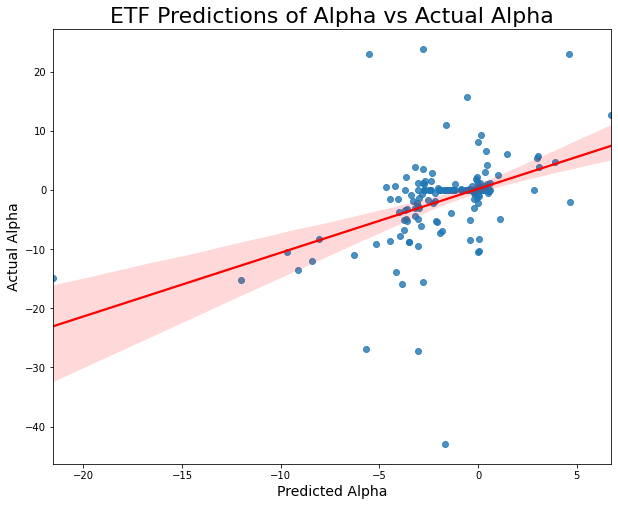

In [43]:
rf_preds = rf_tuned.predict(X_test_sc)

plt.figure(figsize=(10,8))
sns.regplot(data=X_train_sc, x=rf_preds, y=y_test, line_kws={'color':'red'})
plt.xlabel('Predicted Alpha', fontsize=14)
plt.ylabel('Actual Alpha', fontsize=14)
plt.title('ETF Predictions of Alpha vs Actual Alpha', fontsize=22)
plt.show()

Fortunately, we can see that the model accuracy for ETF alpha prediction is slightly higher than the YTD return prediction (23.15%).

However, the model accuracy for ETF isn't as good as the mutual funds' dataset due to the lack of quality ETF data. 

## Feature Importance

Using the tuned model, we've identified the most important features in the prediction model:

In [44]:
feature = rf_tuned.best_estimator_.feature_importances_
sorted_indices = np.argsort(feature)[::-1]
 
feature_labels = etf.columns[1:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feature_labels[sorted_indices[f]],
                            feature[sorted_indices[f]]))

 1) investment_type_Growth         0.177131
 2) fund_sector_financial_services 0.138404
 3) asset_bonds                    0.107789
 4) fund_annual_report_net_expense_ratio 0.100164
 5) fund_sector_technology         0.059510
 6) asset_stocks                   0.056033
 7) fund_yield                     0.055961
 8) fund_sector_healthcare         0.046203
 9) annual_holdings_turnover       0.043807
10) fund_sector_utilities          0.043094
11) fund_bond_maturity             0.035093
12) fund_sector_industrials        0.028676
13) size_type_Medium               0.019881
14) fund_sector_real_estate        0.013880
15) fund_sector_communication_services 0.013638
16) fund_sector_energy             0.013086
17) fund_sector_consumer_defensive 0.010351
18) fund_price_earning_ratio       0.008477
19) investment_type_Blend          0.007237
20) investment_type_Value          0.006164
21) fund_alpha_3years              0.004374
22) fund_sector_consumer_cyclical  0.004053
23) size_type_Large   

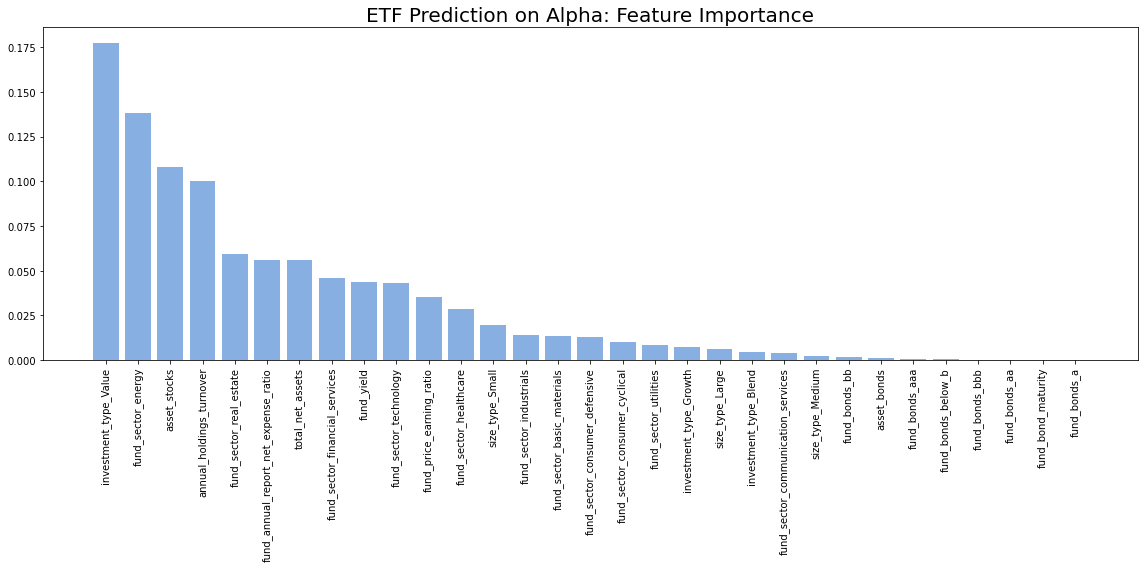

In [45]:
plt.figure(figsize=(16,8))
plt.title('ETF Prediction on Alpha: Feature Importance', size=20)
plt.bar(range(X_train.shape[1]), feature[sorted_indices], align='center', color='#87afe2')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.show()

**Top 10 features**: Investment type (Value), fund sectors (energy, real estate, technology, financial services)
stocks asset breakdown, annual holdings turnover, total net assets, fund yield, operating costs